<a href="https://colab.research.google.com/github/gokulgopz/Ai_handwritten_recogniser/blob/main/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np


print(f"tensorflow Version: {tf.__version__}")

tensorflow Version: 2.18.0


training data shape:(60000, 28, 28)
training labels shape:(60000,)
test data shape:(10000, 28, 28)
test labels shape:(10000, 28, 28)


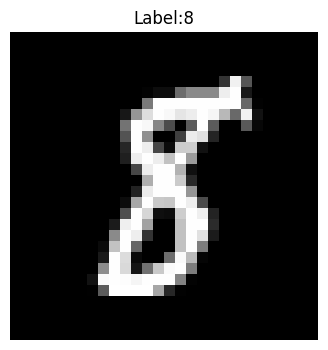

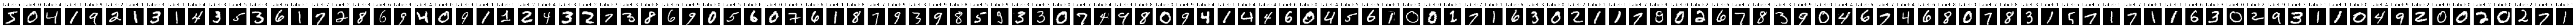

In [12]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

print(f"training data shape:{X_train.shape}")
print(f"training labels shape:{y_train.shape}")
print(f"test data shape:{X_test.shape}")
print(f"test labels shape:{X_test.shape}")


plt.figure(figsize=(4,4))
plt.imshow(X_train[125],cmap='gray')

plt.title(f"Label:{y_train[125]}")
plt.axis('off')

plt.show()


plt.figure(figsize=(125,125))

for i in range(125):
  plt.subplot(1,125,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()


In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Pixel value of X_train[0, 0, 0] after normalization: {X_train[0, 0, 0]}")




# neural network building

model = Sequential([

                    Flatten(input_shape=(28,28)),

                    Dense(128, activation='relu'),

                    Dense(64, activation='relu'),

                    Dense(10, activation='softmax')

])


model.summary()



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Pixel value of X_train[0, 0, 0] after normalization: 0.0


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

training model ...............
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8660 - loss: 0.4466 - val_accuracy: 0.9687 - val_loss: 0.1067
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9663 - loss: 0.1079 - val_accuracy: 0.9747 - val_loss: 0.0889
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9772 - loss: 0.0705 - val_accuracy: 0.9747 - val_loss: 0.0888
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9832 - loss: 0.0506 - val_accuracy: 0.9773 - val_loss: 0.0815
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9870 - loss: 0.0412 - val_accuracy: 0.9787 - val_loss: 0.0782
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9757 - val_loss: 0.1037
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9758 - val_loss: 0.1058
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - a

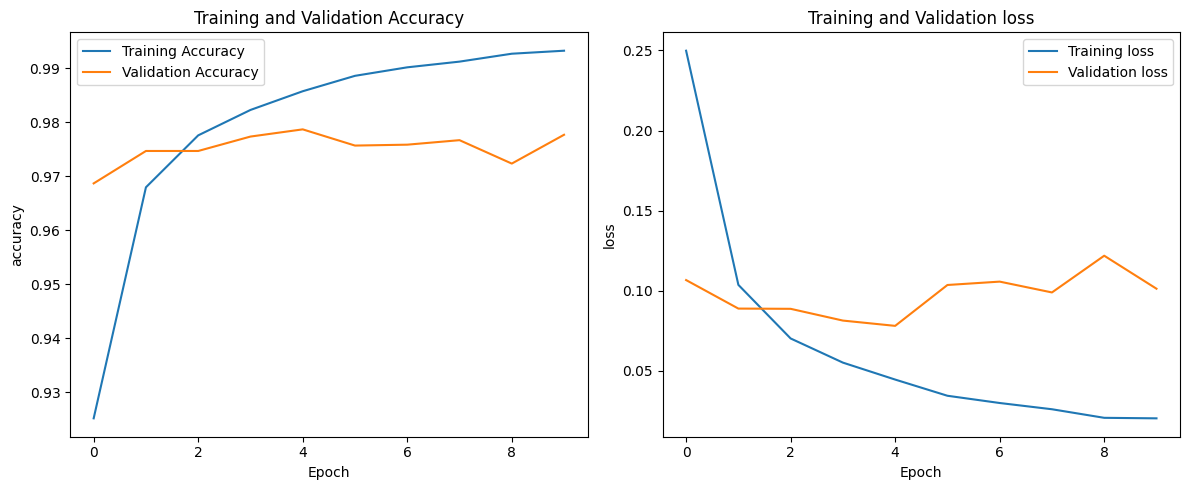

In [14]:
# model training
# epochs: how many times the model will go through the entire training dataset
# batch_size: number of samples per gradient update (how many images to process before updating weights)

print("training model ...............")
history = model.fit(X_train,y_train,epochs=10, batch_size=32 , validation_split=0.1)

print("training model ///////completed//////////")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()



plt.subplot(1,2,2)

plt.plot(history.history['loss'], label='Training loss')

plt.plot(history.history['val_loss'], label='Validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()


plt.tight_layout()
plt.show()







In [15]:
print("\n Evaluating the model on the test set.........")

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)


print(f"\n Test Loss:{test_loss:.4f}" )
print(f"\n Test Accuracy:{test_accuracy:.4f}" )



 Evaluating the model on the test set.........
313/313 - 1s - 3ms/step - accuracy: 0.9753 - loss: 0.0961

 Test Loss:0.0961

 Test Accuracy:0.9753


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

 Prediction for the first 10 test images :
Image 0 : Predicted : 7 Actual: 7
Image 1 : Predicted : 2 Actual: 2
Image 2 : Predicted : 1 Actual: 1
Image 3 : Predicted : 0 Actual: 0
Image 4 : Predicted : 4 Actual: 4
Image 5 : Predicted : 1 Actual: 1
Image 6 : Predicted : 4 Actual: 4
Image 7 : Predicted : 9 Actual: 9
Image 8 : Predicted : 5 Actual: 5
Image 9 : Predicted : 9 Actual: 9


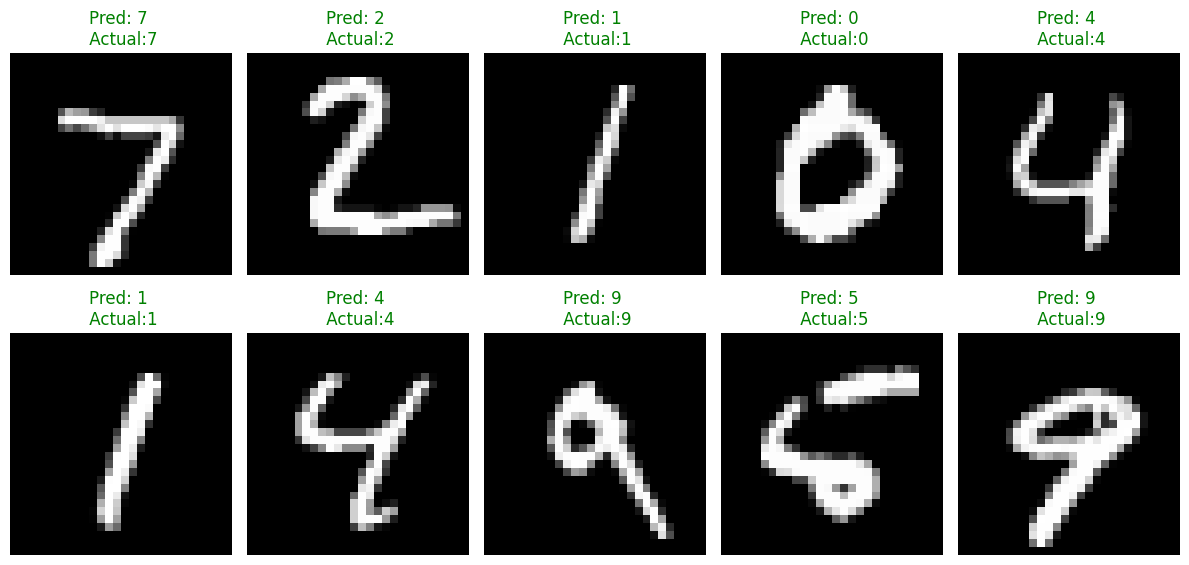

In [16]:
predictions = model.predict(X_test[:10])

print("\n Prediction for the first 10 test images :")

predicted_classes= np.argmax(predictions, axis=1)

for i in range(10):
  print(f"Image {i} : Predicted : {predicted_classes[i]} Actual: {y_test[i]}")



plt.figure(figsize=(12,6))

for i in range(10):
  plt.subplot(2,5,i + 1)
  plt.imshow(X_test[i], cmap='gray')

  color="green" if predicted_classes[i]== y_test[i] else "red"
  plt.title(f"Pred: {predicted_classes[i]} \n Actual:{y_test[i]}", color=color)

  plt.axis("off")
plt.tight_layout()
plt.show()